In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Importing data into dataframe
df = pd.read_csv('../data/raw/fff_Bw_1min.dat', delim_whitespace=True)

#Adding column names to dataframe
df.columns = ['year', 'month', 'day', 'hour', 'minute', 
              'L', 'MLT', 'MLAT', 'AL Index', 
              'KP Index', 'Satellite Flag', 'B']

# Converting year + month + day + hour + minute + second to datetime
datetime = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute']])

# Adding datetime column to dataframe
df.insert(0, "datetime", datetime, True)

# Dropping useless columns
df = df.drop(['year', 'month', 'day', 'hour', 'minute', 'AL Index', 'KP Index'], axis=1)

df.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,datetime,L,MLT,MLAT,Satellite Flag,B
0,2010-06-01 10:51:00,9.13,22.69,-1.43,0.0,0.000765
1,2010-06-01 10:52:00,9.03,22.7,-1.44,0.0,0.000699
2,2010-06-01 10:53:00,9.02,22.7,-1.45,0.0,0.000786
3,2010-06-01 10:54:00,9.06,22.71,-1.46,0.0,0.000748
4,2010-06-01 10:55:00,8.95,22.72,-1.48,0.0,0.000933


In [4]:
df['Satellite Flag'].value_counts()

0.000000    482881
1.000000    461864
2.000000    459017
0.001010      2519
0.001040      2455
             ...  
0.169000         1
0.236000         1
0.000566         1
0.088200         1
0.278000         1
Name: Satellite Flag, Length: 2334, dtype: int64

In [5]:
# Converting satellite flag values to int
df['Satellite Flag'] = df['Satellite Flag'].astype(int)
df['Satellite Flag'].value_counts()

0    738633
1    461864
2    459017
Name: Satellite Flag, dtype: int64

In [6]:
df_sat0 = df.loc[(df['Satellite Flag'] == 0)]
df_sat0.tail()

,datetime,L,MLT,MLAT,Satellite Flag,B
1659252,2018-02-28 14:39:00,9.80,22.85-12.11,-185.0,0,NaN
1659253,2018-02-28 14:40:00,9.89,22.86-12.11,-196.0,0,NaN
1659254,2018-02-28 14:41:00,9.88,22.86-12.11,-204.0,0,NaN
1659255,2018-02-28 14:42:00,9.91,22.87-12.10,-197.0,0,NaN
1659256,2018-02-28 14:43:00,9.94,22.87-12.10,-177.0,0,NaN


In [7]:
df_sat0['Satellite Flag'].value_counts()

0    738633
Name: Satellite Flag, dtype: int64

In [8]:
df_sat0_sorted = df_sat0.sort_values(by = 'datetime')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


(array([733773., 734138., 734503., 734869., 735234., 735599., 735964.,
        736330., 736695.]), <a list of 9 Text xticklabel objects>)

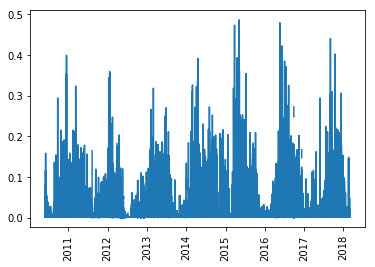

In [9]:
# Plotting data for 1 satellite to see if there is a trend
plt.plot(df_sat0_sorted['datetime'], df_sat0_sorted['B'])
plt.xticks(rotation='vertical')

In [10]:
# Check if measurements are being taken every minute or not
df_sat0_sorted['datetime_diff'] = df_sat0_sorted['datetime'].diff()
df_sat0_sorted.head()
pd.set_option('display.max_rows', df_sat0_sorted.shape[0]+1)
df_sat0_sorted['datetime_diff'].value_counts()

0 days 00:01:00     643432
0 days 00:00:00      83976
0 days 00:02:00       3394
0 days 00:03:00       1405
0 days 00:04:00        700
0 days 00:06:00        476
0 days 00:05:00        459
0 days 00:07:00        248
0 days 00:09:00        240
0 days 00:08:00        202
0 days 00:10:00        110
0 days 00:11:00         84
0 days 00:12:00         73
0 days 00:13:00         68
0 days 00:14:00         65
0 days 00:17:00         46
0 days 00:15:00         39
0 days 00:16:00         37
0 days 11:34:00         35
0 days 00:18:00         30
0 days 00:20:00         30
0 days 00:19:00         29
0 days 00:22:00         27
0 days 11:24:00         26
0 days 00:54:00         26
0 days 00:23:00         24
0 days 00:24:00         23
0 days 00:21:00         22
1 days 00:03:00         21
1 days 00:04:00         21
0 days 00:28:00         16
0 days 00:30:00         16
0 days 00:34:00         16
0 days 00:25:00         16
0 days 01:54:00         15
0 days 00:36:00         15
0 days 00:26:00         15
0

In [11]:
# Total missing time
print("Total missing time with 1 minute timesteps:", df_sat0_sorted['datetime_diff'].sum())

print("Total missing time with 1 hour timesteps:", 
      df_sat0_sorted['datetime_diff'].where(df_sat0_sorted['datetime_diff'] > '01:00:00').sum())

print("Total missing time with 2 day timesteps:", 
      df_sat0_sorted['datetime_diff'].where(df_sat0_sorted['datetime_diff'] >= '2 days').sum())

print("Total missing time with 10 days timesteps:", 
      df_sat0_sorted['datetime_diff'].where(df_sat0_sorted['datetime_diff'] > '10 days').sum())

Total missing time with 1 minute timesteps: 2829 days 03:52:00
Total missing time with 1 hour timesteps: 2346 days 11:01:00
Total missing time with 2 day timesteps: 849 days 16:21:00
Total missing time with 10 days timesteps: 31 days 17:51:00


In [12]:
print((2829 - 643432/(24*60))/365)

6.526499238964993


In [24]:
# Clearly there is missing data, we can use some technique to fill it
# Insert missing rows
# Set datetime as the index with frequency of 1 minute
# Dropping duplicates
df_sat0_sorted_1 = df_sat0_sorted[~df_sat0_sorted.datetime.duplicated()]
df_sat0_sorted_1 = df_sat0_sorted_1.set_index('datetime')
print("Old dataframe size =", df_sat0_sorted.size)
print("New dataframe size =", df_sat0_sorted_1.size)

Old dataframe size = 5170431
New dataframe size = 3927942


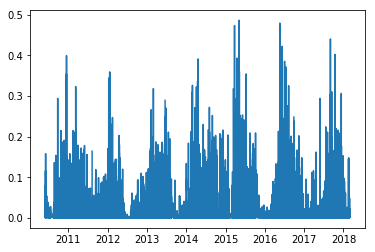

In [25]:
# Plotting data again
plt.plot(df_sat0_sorted_1['B'])

In [32]:
# Taking average of every day
df_sat0_sorted_1_resampled_1day = df_sat0_sorted_1.resample('1440Min').mean()
df_sat0_sorted_1_resampled_1day.head()

,L,MLAT,Satellite Flag,B
datetime,,,,
2010-06-01,6.561608,-1.397487,0.0,0.001997
2010-06-02,6.689676,-1.489676,0.0,0.001322
2010-06-03,6.329808,-1.194904,0.0,0.021389
2010-06-04,6.381292,-1.186986,0.0,0.010071
2010-06-05,6.478571,-1.288878,0.0,0.001085


(array([733773., 734138., 734503., 734869., 735234., 735599., 735964.,
        736330., 736695.]), <a list of 9 Text xticklabel objects>)

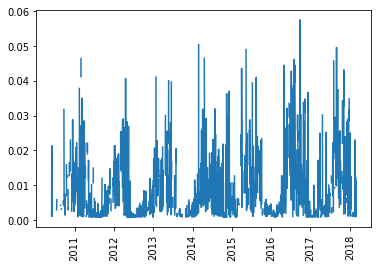

In [35]:
# Plotting to visualize extent of missing data
plt.plot(df_sat0_sorted_1_resampled_1day['B'])
plt.xticks(rotation='vertical')

In [38]:
# Imputing using interpolation with different methods

def interpolate(df):
    df = df.assign(InterpolateLinear    = df.B.interpolate(method='linear'))
    df = df.assign(InterpolateTime      = df.B.interpolate(method='time'))
    df = df.assign(InterpolateQuadratic = df.B.interpolate(method='quadratic'))
    df = df.assign(InterpolateCubic     = df.B.interpolate(method='cubic'))
    df = df.assign(InterpolateSLinear   = df.B.interpolate(method='slinear'))
    df = df.assign(InterpolateAkima     = df.B.interpolate(method='akima'))
    df = df.assign(InterpolatePoly5     = df.B.interpolate(method='polynomial', order=5)) 
    df = df.assign(InterpolatePoly7     = df.B.interpolate(method='polynomial', order=7))
    df = df.assign(InterpolateSpline3   = df.B.interpolate(method='spline', order=3))
    df = df.assign(InterpolateSpline4   = df.B.interpolate(method='spline', order=4))
    df = df.assign(InterpolateSpline5   = df.B.interpolate(method='spline', order=5))
    return df

In [42]:
df_sat0_sorted_1_resampled_1day_interpolated = interpolate(df_sat0_sorted_1_resampled_1day)
print(df_sat0_sorted_1_resampled_1day_interpolated)

                   L        MLAT  Satellite Flag         B  InterpolateLinear  \
datetime                                                                        
2010-06-01  6.561608   -1.397487             0.0  0.001997           0.001997   
2010-06-02  6.689676   -1.489676             0.0  0.001322           0.001322   
2010-06-03  6.329808   -1.194904             0.0  0.021389           0.021389   
2010-06-04  6.381292   -1.186986             0.0  0.010071           0.010071   
2010-06-05  6.478571   -1.288878             0.0  0.001085           0.001085   
2010-06-06  6.615187   -1.358770             0.0  0.006487           0.006487   
2010-06-07  6.670546   -1.379672             0.0  0.002899           0.002899   
2010-06-08       NaN         NaN             NaN       NaN           0.003044   
2010-06-09       NaN         NaN             NaN       NaN           0.003188   
2010-06-10       NaN         NaN             NaN       NaN           0.003333   
2010-06-11       NaN        

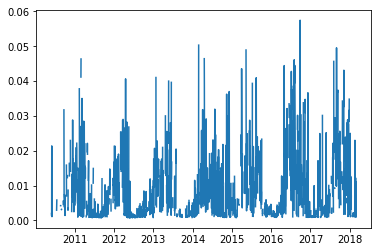

In [59]:
final_df= df_sat0_sorted_1_resampled_1day_interpolated[['B', 'InterpolateLinear']]
plt.plot(final_df['B'], label = 'B_original')
plt.show()

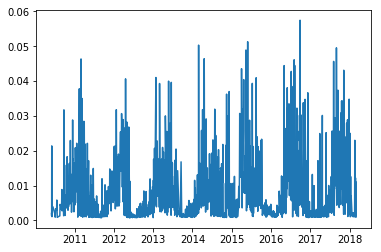

In [58]:
plt.plot(final_df['InterpolateLinear'], label = 'InterpolateLinear')
plt.show()